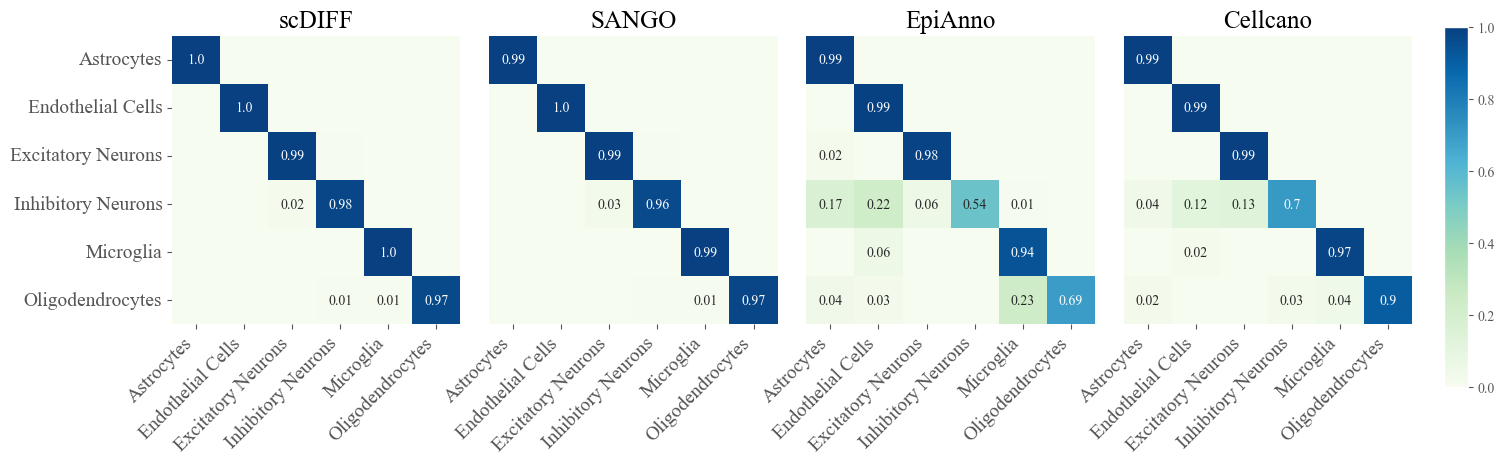

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# Set Times New Roman font path
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'

# Create font properties
font_prop = FontProperties(fname=font_path)

# Set font
rcParams['font.family'] = font_prop.get_name()


# Set Times New Roman as the font family
plt.rcParams['font.family'] = 'Times New Roman'

# ref1_query0
# MosA1_MosA2
# MosA1_MosA2
# MosA1_MosA2
# Load CSV files for each method
data_scDIFF = pd.read_csv('/mnt/d/Desktop/R/scDIFF_res/MosA1_MosA2_ref1_query0.csv', header=0)
data_Seurat = pd.read_csv('/mnt/d/Desktop/R/Seurat_res/MosA1_MosA2_ref1_query0.csv', header=0)
data_SingleR = pd.read_csv('/mnt/d/Desktop/R/SingleR_res/MosA1_MosA2_ref1_query0.csv', header=0)
data_EpiAnno = pd.read_csv('/mnt/d/Desktop/R/EpiAnno_res/MosA1_MosA2_ref1_query0.csv', header=0)
data_SANGO = pd.read_csv('/mnt/d/Desktop/R/SANGO_res/MosA1_MosA2_ref1_query0.csv', header=0)
data_Cellcano = pd.read_csv('/mnt/d/Desktop/R/Cellcano_res/MosA1_MosA2_ref1_query0.csv', header=0)


# Create confusion matrix using only categories from true_label
def create_confusion_matrix(data):
    # Get only categories from true_label
    true_classes = sorted(data['true_label'].unique())
    
    # Create confusion matrix
    cm = confusion_matrix(
        data['true_label'],
        data['predicted_label'],
        labels=true_classes  # Use only categories from true_label
    )
    
    return cm, true_classes

# Calculate confusion matrix and corresponding labels for each dataset
cm_scDIFF, labels_scDIFF = create_confusion_matrix(data_scDIFF)
cm_Seurat, labels_Seurat = create_confusion_matrix(data_Seurat)
cm_SingleR, labels_SingleR = create_confusion_matrix(data_SingleR)
cm_EpiAnno, labels_EpiAnno = create_confusion_matrix(data_EpiAnno)
cm_SANGO, labels_SANGO = create_confusion_matrix(data_SANGO)
cm_Cellcano, labels_Cellcano = create_confusion_matrix(data_Cellcano)

# Normalization function
def normalize_confusion_matrix(cm):
    row_sums = cm.sum(axis=1)
    row_sums[row_sums == 0] = 1
    return cm / row_sums[:, np.newaxis]

# Normalize all confusion matrices
cm_scDIFF_normalized = normalize_confusion_matrix(cm_scDIFF)
cm_Seurat_normalized = normalize_confusion_matrix(cm_Seurat)
cm_SingleR_normalized = normalize_confusion_matrix(cm_SingleR)
cm_EpiAnno_normalized = normalize_confusion_matrix(cm_EpiAnno)
cm_SANGO_normalized = normalize_confusion_matrix(cm_SANGO)
cm_Cellcano_normalized = normalize_confusion_matrix(cm_Cellcano)

# Function to filter zero values for annotation
def filter_zeros_for_annot(cm):
    # Use threshold to handle floating point precision issues
    return np.where(np.abs(cm) < 1e-2, '', cm.round(2).astype(str))

# Plotting code
plt.style.use('ggplot')

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Plot confusion matrix heatmaps
sns.heatmap(cm_scDIFF_normalized, annot=filter_zeros_for_annot(cm_scDIFF_normalized), fmt='', cmap="GnBu", 
            cbar=False, ax=axes[0], square=True,
            xticklabels=labels_scDIFF, yticklabels=labels_scDIFF)
axes[0].set_title('scDIFF', fontsize=18)

sns.heatmap(cm_SANGO_normalized, annot=filter_zeros_for_annot(cm_SANGO_normalized), fmt='', cmap="GnBu", 
            cbar=False, ax=axes[1], square=True,
            xticklabels=labels_SANGO, yticklabels=False)
axes[1].set_title('SANGO', fontsize=18)

sns.heatmap(cm_EpiAnno_normalized, annot=filter_zeros_for_annot(cm_EpiAnno_normalized), fmt='', cmap="GnBu", 
            cbar=False, ax=axes[2], square=True,
            xticklabels=labels_EpiAnno, yticklabels=False)
axes[2].set_title('EpiAnno', fontsize=18)

sns.heatmap(cm_Cellcano_normalized, annot=filter_zeros_for_annot(cm_Cellcano_normalized), fmt='', cmap="GnBu", 
            cbar=False, ax=axes[3], square=True,
            xticklabels=labels_Cellcano, yticklabels=False)
axes[3].set_title('Cellcano', fontsize=18)

# Rotate x-axis labels
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=14)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.6])
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap="GnBu", norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)

# Adjust subplot spacing
fig.subplots_adjust(right=0.9, wspace=0.1)
# plt.savefig('/home/daozhang/Draw_picture/MosA2_MosA1_confusion_matrix.svg', format='svg',bbox_inches='tight')
plt.show()